Import from the modules we will be using

In [18]:
from functions import *
import numpy as np
import pandas as pd
from functions import *
from questions import *
from visualization import *
from models import *
from pprint import pprint
from dictionary import *

Make jupyter's core autoreload changes made in the python files.

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Read our dataframes

In [20]:
dataframe1, dataframe2 = read_files()

Do a minor edit in df1 so as to have all split product codes saved as a set

In [21]:
dataframe1, dataframe2 = edit_dfs(dataframe1, dataframe2)

Index(['Practical Information', 'Product Code and Name', 'Unnamed: 2',
       'Qualitative Information - Findings', 'Unnamed: 4', 'Unnamed: 5',
       'Experience', 'month', 'Unnamed: 0', 'Reviews', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Product Code', 'Name of Product',
       'split_product_code', 'Country', 'language', 'split_product_codes',
       'Standardized_Experience', 'number_of_stories'],
      dtype='object')


c:\Users\steve\Clio_Muse Data Analysis Project\functions.py:309: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dataframe1['booking_date'] = pd.to_datetime(dataframe1['booking_date'], dayfirst=True)


Modify the second dataframe to also include profit

In [22]:
dataframe2 = add_df2_profit(dataframe1, dataframe2)

Which tours go together?

In [23]:
go_together = which_tours_go_together(dataframe1, dataframe2)

Note that this function does not filter based on profit, it just groups tours together based on their occurences.

Since the original data is private, we ll use a dictionary to map it to different values

In [52]:
mapped_go_together = go_together_mapping(go_together)
go_together

,product_combinations,Occurrences,Average_Profit,tour_names
23,"(A001, B004)",1689,20.760805,Confidential
19,"(A002, B002)",1138,34.249209,Confidential
16,"(A003, B003)",1078,35.521336,Confidential
21,"(A004, A005, A006, B004)",878,45.065626,Confidential
2,"(A007, A008, A009, B009)",856,11.691589,Confidential
4,"(A010, B006)",809,31.838875,Confidential
13,"(A011, B007)",549,30.764299,Confidential
6,"(A012, B008)",470,40.600894,Confidential
0,"(A007, A013, A009, B009)",427,41.723653,Confidential
24,"(A006, B004)",397,18.229723,Confidential


In [26]:
dataframe1.columns

Index(['id', 'reference_code', 'travel_date', 'booking_date', 'booking_status',
       'split_product_code', 'language', 'tours', 'product_title',
       'product_type', 'product_country', 'seller_name', 'seller_id', 'month',
       'task_id', 'channel', 'num_of_travellers', 'retail_price', 'net_price',
       'product_code', 'stories', 'Country', 'Ticket Price', 'Profit',
       'split_product_codes', 'booking_day', 'booking_hour', 'travel_day',
       'travel_day_number', 'travel_month', 'number_of_stories',
       'money_spent_per_traveller'],
      dtype='object')

In [27]:
#how does a successful tour look like?
successful = successful_tour_looks_like(dataframe1, dataframe2)

Here are the charachteristics of tours that have a profit higher than the mean, as well as the most popular tours per country and month.

In [28]:
successful.head(12)

,Country,month,most_common_tour,average_travellers,Total_Travellers,Average_number_of_products,Total_profit,Top_3_travel_days,Average_Money_Spent_per_group,average_money_spent_per_traveller,most_common_languages,most_common_number_of_stories
6,Greece,August,"[Acropolis, Acropolis Museum & 6 Archaeological Sites Tickets]",3.918699,369,2.181572,22040.39,"[(Wednesday, 81), (Thursday, 52), (Monday, 50)]",91.500352,23.696721,[English],2
29,Portugal,August,[Quinta da Regaleira Entry Ticket],3.591224,433,1.752887,21958.60,"[(Thursday, 82), (Wednesday, 81), (Monday, 74)]",77.029099,22.684758,[English],1
35,Portugal,May,[St. George Castle e -ticket with audio tours],3.610959,365,2.769863,18273.50,"[(Monday, 61), (Saturday, 59), (Wednesday, 57)]",87.308219,25.297260,[English],2
33,Portugal,June,[St. George Castle e -ticket with audio tours],3.628676,272,2.643382,14030.60,"[(Friday, 57), (Monday, 45), (Thursday, 41)]",87.759559,25.440074,[English],2
10,Greece,June,[NAM & Athens City Tour],4.051643,213,1.830986,13744.50,"[(Monday, 40), (Friday, 37), (Thursday, 35)]",92.298122,22.671362,[English],2
28,Portugal,April,"[Pena Palace, the Moorish Castle, the Quinta da Regaleira + Sintra]",4.331839,223,3.282511,13032.00,"[(Sunday, 45), (Monday, 43), (Friday, 35)]",100.461883,23.356502,[English],4
12,Greece,May,"[Acropolis, Acropolis Museum & 6 Archaeological Sites Tickets]",4.212329,146,2.082192,9594.91,"[(Wednesday, 30), (Friday, 26), (Tuesday, 22)]",96.423836,22.818288,[English],1
48,Spain,October,[Entry e-tickets for The Mosque-Cathedral of Cordoba with an audio tour of the city of Cordoba],4.043165,139,1.791367,9363.92,"[(Sunday, 26), (Monday, 23), (Tuesday, 23)]",93.733094,23.237266,[English],2
37,Portugal,October,[Quinta da Regaleira Entry Ticket],4.018072,166,1.765060,9339.15,"[(Saturday, 35), (Tuesday, 25), (Sunday, 24)]",81.037048,20.249096,[English],1
38,Portugal,September,[Quinta da Regaleira Entry Ticket],3.945122,164,1.689024,8973.00,"[(Sunday, 27), (Friday, 26), (Thursday, 26)]",79.097561,20.146341,[English],1


In [29]:
#which tours do we recommend to a traveller?
which_tours_do_we_recommend_to_a_traveller(dataframe1, dataframe2, go_together)

In [30]:
save_to_excel(dataframe1, dataframe2)

In [31]:
from IPython.display import display
display(dataframe1.head(5))

,id,reference_code,travel_date,booking_date,booking_status,split_product_code,language,tours,product_title,product_type,...,Ticket Price,Profit,split_product_codes,booking_day,booking_hour,travel_day,travel_day_number,travel_month,number_of_stories,money_spent_per_traveller
0,98825,GYGX7Q4WHBX3,2023-01-05,2022-12-13 23:11:00,ACTIVE,STL284,English,284,Castel Sant’ Angelo: Skip-the-Line Ticket & Audio Tour,Skip-the-Line,...,34.00,24.00,"{288DE, STL284}",Tuesday,23,Thursday,travel_date,1,2,29.00
8,98826,GYG32NWHYK2Z,2023-01-03,2022-12-13 23:04:00,ACTIVE,STL526,English,526,Moorish Castle: Skip-The-Line e-ticket with Audio Tour,Skip-the-Line,...,35.00,19.00,"{537DE, STL526, 539}",Tuesday,23,Tuesday,travel_date,1,3,18.00
18,98828,GYGMX57A5K6H,2023-01-03,2022-12-13 23:06:00,ACTIVE,STL539,Spanish,539,Quinta da Regaleira: Skip-The-Line e-ticket with Audio Tour - Spanish,Skip-the-Line,...,26.00,16.00,"{537EN, STL539}",Tuesday,23,Tuesday,travel_date,1,2,21.00
26,98855,GYG83Y54QLYF,2023-01-07,2022-12-14 11:02:00,ACTIVE,STL55,Italian,55,National Archaeological Museum: Skip-The-Line e-ticket with Audio Tour - Italian,Skip-the-Line,...,16.00,26.00,"{STL55, 447DE}",Wednesday,11,Saturday,travel_date,1,2,14.00
39,98877,GYG2RA8L48HY,2023-01-18,2022-12-15 07:34:00,ACTIVE,AU226,English,226,Heraklion: the Castle of the Moat,Audio,...,9.99,9.99,{AU226DE},Thursday,7,Wednesday,travel_date,1,1,9.99


In [32]:
dataframe2.head(2)

,Practical Information,Product Code and Name,Unnamed: 2,Qualitative Information - Findings,Unnamed: 4,Unnamed: 5,Experience,month,Product Code,Name of Product,split_product_code,Country,language,split_product_codes,Standardized_Experience,number_of_stories,Profit
0,Important Information,Name of Product Reviewed,Review,Content,Technology,Customer Support,Overall Experience,January,Name of Product Reviewed,None,Name of Product Reviewed,NaN,NaN,{Name of Product Reviewed},NaN,1,NaN
1,False,STL55 | Athens National Archaeological Museum Ticket with Audio Tour,"Without the Audio Guide I would not have understood a lot of this. Since I do not speak or read Greek, the Audio Guide is really highly recommended. Although not every piece in the museum is explained, the information was enough for me. Handling downloads and playback is usually simple. However, I would book the tour two days in advance, as you have to download an app for the audio file. I also recommend good headphones.",NaN,NaN,NaN,Excellent (5 stars),January,STL55,Athens National Archaeological Museum Ticket with Audio Tour,STL55,NaN,NaN,{STL55},5,1,26.0


c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) 

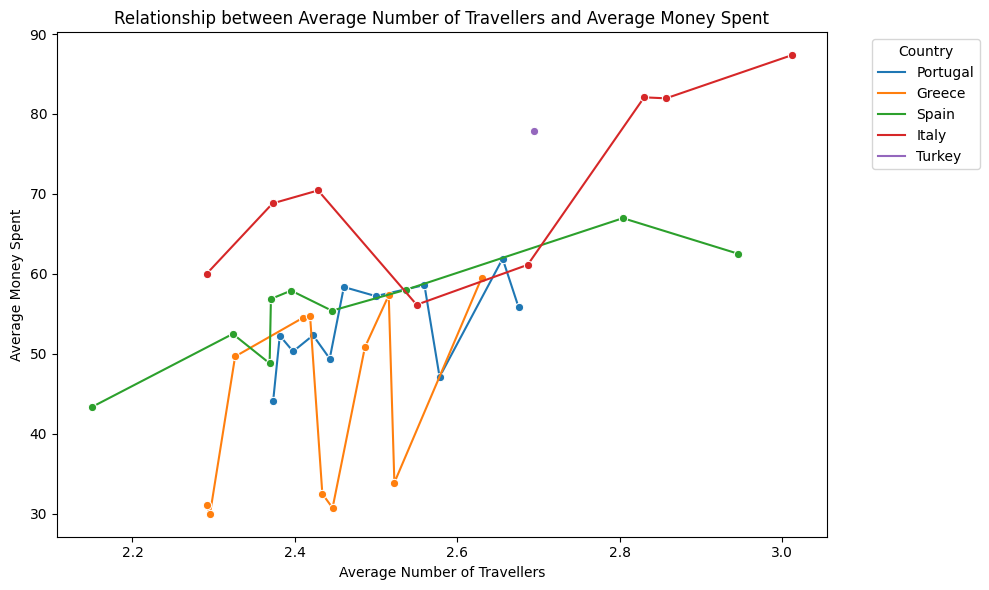

In [33]:
travellers_vs_spending_with_months(dataframe1)


Note: The average number of travellers per country changes depending on the month.

c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


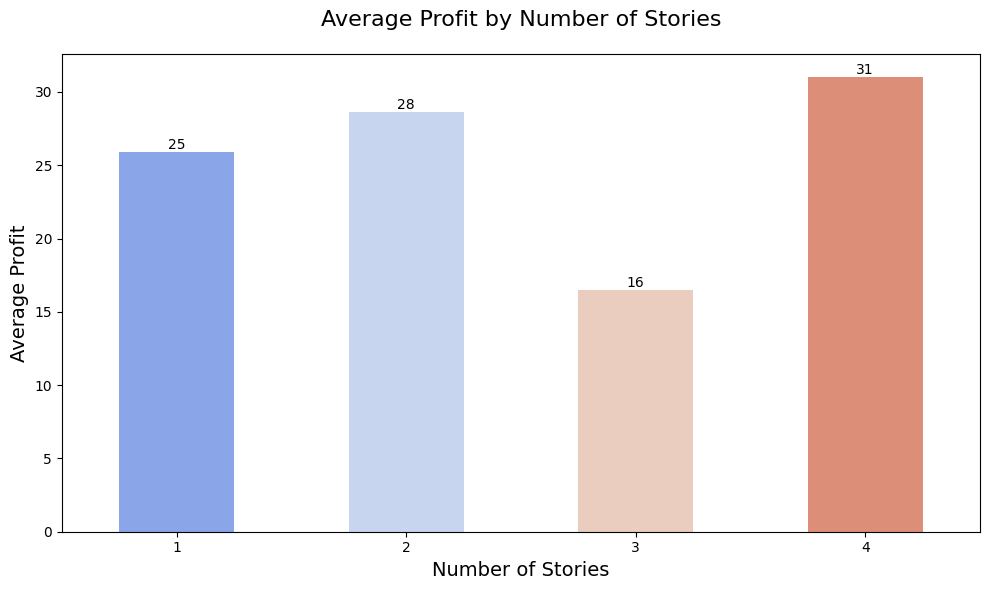

,Number of Stories,Average Profit
0,1,25.926304
1,2,28.611188
2,3,16.465882
3,4,31.048301


In [34]:
optimum_number_of_stories_profit(dataframe1)

c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


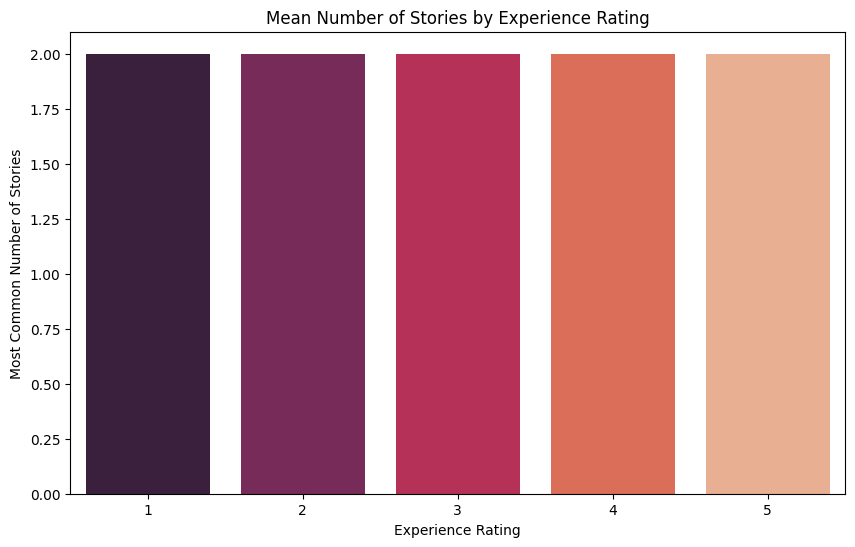

In [35]:
optimum_number_of_stories_liked(dataframe2)

We can see that the most common number of stories per booking is 2, regardless of user experience.
We can deduct that it is better to strive for 2 stories then.

In [36]:
dataframe1.columns

Index(['id', 'reference_code', 'travel_date', 'booking_date', 'booking_status',
       'split_product_code', 'language', 'tours', 'product_title',
       'product_type', 'product_country', 'seller_name', 'seller_id', 'month',
       'task_id', 'channel', 'num_of_travellers', 'retail_price', 'net_price',
       'product_code', 'stories', 'Country', 'Ticket Price', 'Profit',
       'split_product_codes', 'booking_day', 'booking_hour', 'travel_day',
       'travel_day_number', 'travel_month', 'number_of_stories',
       'money_spent_per_traveller'],
      dtype='object')

In [37]:
dataframe2.columns

Index(['Practical Information', 'Product Code and Name', 'Unnamed: 2',
       'Qualitative Information - Findings', 'Unnamed: 4', 'Unnamed: 5',
       'Experience', 'month', 'Product Code', 'Name of Product',
       'split_product_code', 'Country', 'language', 'split_product_codes',
       'Standardized_Experience', 'number_of_stories', 'Profit'],
      dtype='object')

Let us run an association rules algorithm, to get a better idea of which tours go together


Most frequent itemsets;

The most frequent itemsets are;

Create  a product code to product title mapping for dataframe1.

In [38]:
product_code_to_title = dict(zip(dataframe1['product_code'], dataframe1['product_title']))

In [39]:
associate_together(dataframe1, product_code_to_title)

KeyError: '181'

For each country, find the 5 most common hours of booking tickets

In [ ]:
common_booking_hours(dataframe1)

,Country,Most_Common_Booking_hours
0,Austria,"14, 19, 16, 13, 15"
1,China,"2, 15, 4"
2,Egypt,"1, 20, 15, 4, 7, 12"
3,Germany,"13, 12, 9"
4,Greece,"8, 9, 7, 19, 18, 17"
5,Hungary,"15, 18, 0, 8"
6,Italy,"19, 18, 20, 15, 17, 14"
7,Portugal,"10, 9, 11, 8, 12, 20"
8,Spain,"18, 9, 19, 16, 14, 13"
9,The Netherlands,"14, 11, 7, 9, 20"


In [ ]:
successful_without_months = successful_tour_looks_like_without_months(dataframe1, dataframe2)

c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) 

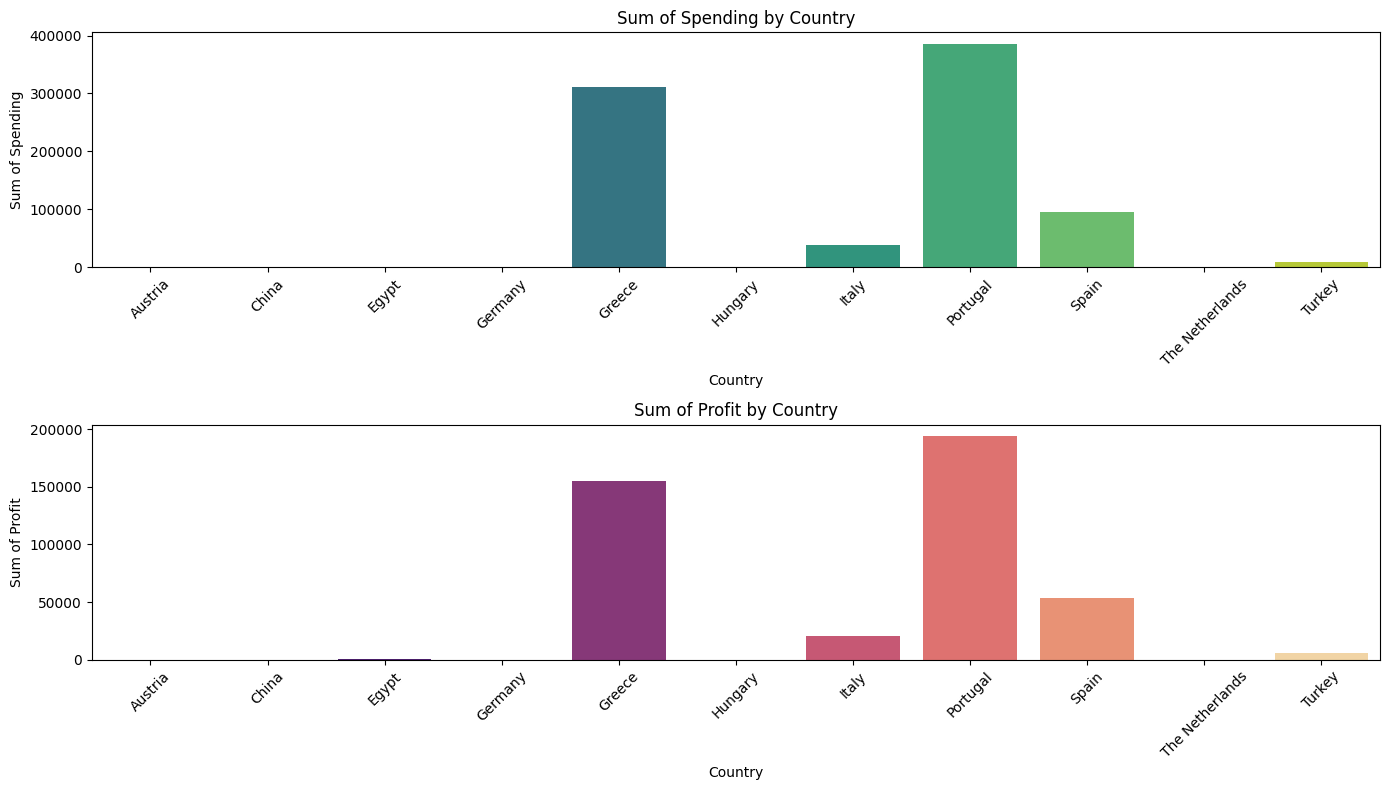

In [ ]:
country_spending(dataframe1)

C:\Users\steve\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Δεν είναι δυνατή η εύρεση του καθορισμένου αρχείου από το σύστημα
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\steve\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\steve\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\steve\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\steve\anaconda3\Lib\subprocess.py", line 15

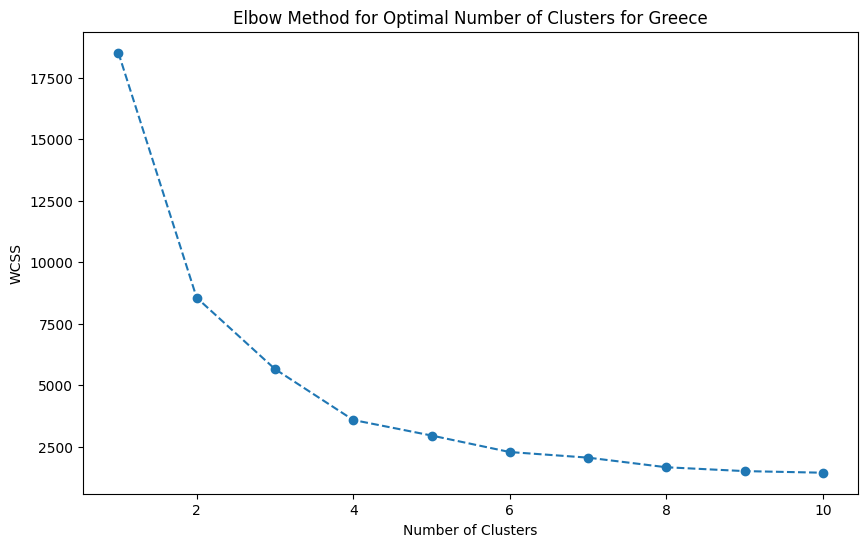

c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


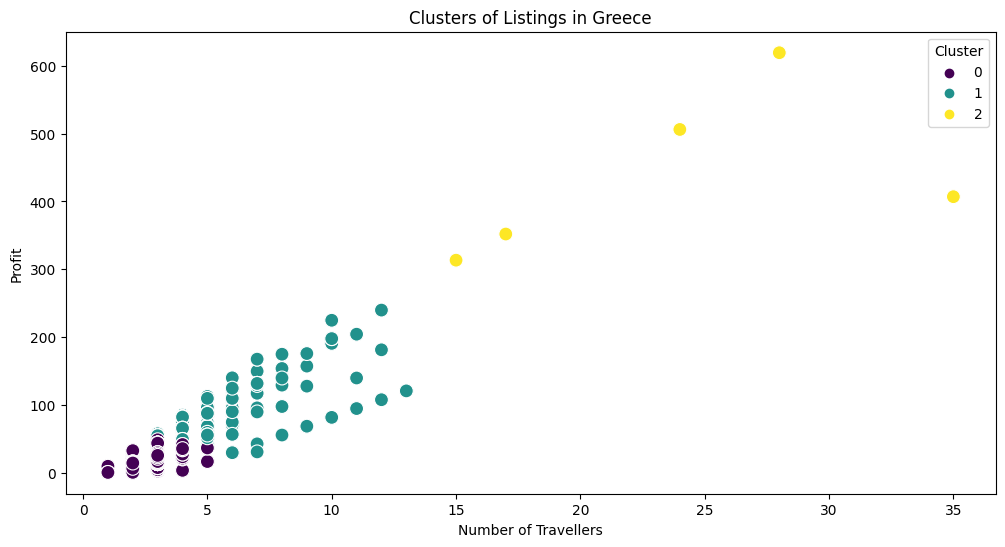

c:\Users\steve\Clio_Muse Data Analysis Project\models.py:123: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_clustered_df = country_df.groupby('Cluster').apply(lambda x: x).reset_index(drop=True)


Cluster Summary for Greece:
   Cluster  avg_num_of_travellers  total_travellers  avg_profit  total_profit  \
0        0               2.124885           11519.0   18.010445      97634.62   
1        1               4.757697            3554.0   73.674217      55034.64   
2        2              23.800000             119.0  439.500000       2197.50   

   avg_spending  total_spending   most_common_tours most_common_travel_days  \
0     42.158569       228541.60  TO240_181_51_459DE                  Friday   
1    106.813762        79789.88  TO240_181_51_278DE               Wednesday   
2    473.700000         2368.50  TO240_181_51_278DE                 Tuesday   

   count_listings  
0            5421  
1             747  
2               5  


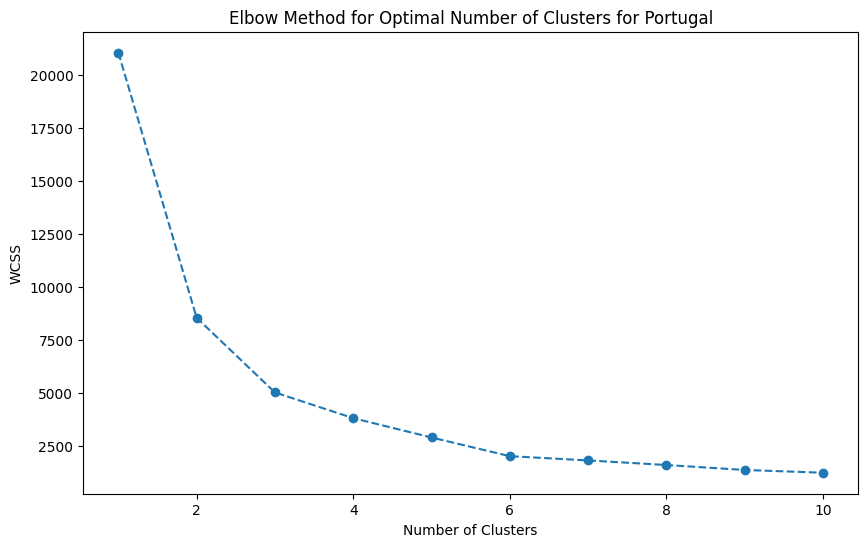

c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


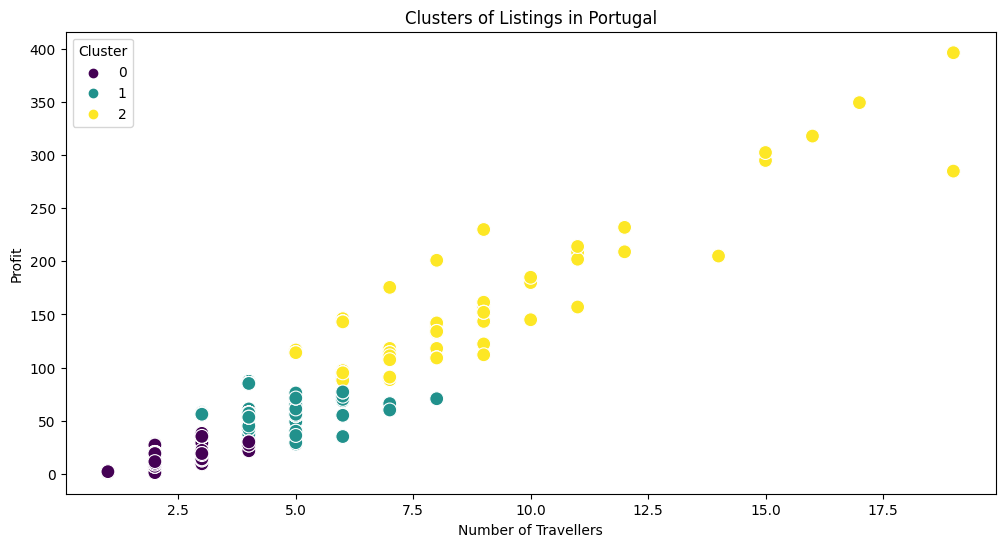

c:\Users\steve\Clio_Muse Data Analysis Project\models.py:123: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_clustered_df = country_df.groupby('Cluster').apply(lambda x: x).reset_index(drop=True)


Cluster Summary for Portugal:
   Cluster  avg_num_of_travellers  total_travellers  avg_profit  total_profit  \
0        0               2.104317           12285.0   20.192987     117886.66   
1        1               4.148515            4190.0   54.607941      55154.02   
2        2               7.284024            1231.0  125.027219      21129.60   

   avg_spending  total_spending     most_common_tours  \
0     45.823763       267519.13          STL539_537DE   
1     90.378238        91282.02  STL539_525_526_537EN   
2    162.216568        27414.60  STL539_525_526_537EN   

   most_common_travel_days  count_listings  
0                   Monday            5838  
1                   Monday            1010  
2  Monday, Sunday, Tuesday             169  


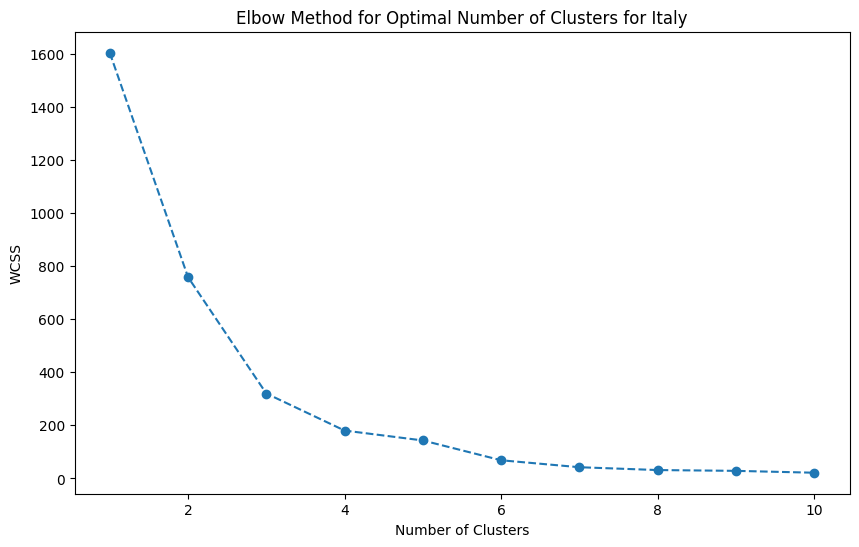

c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


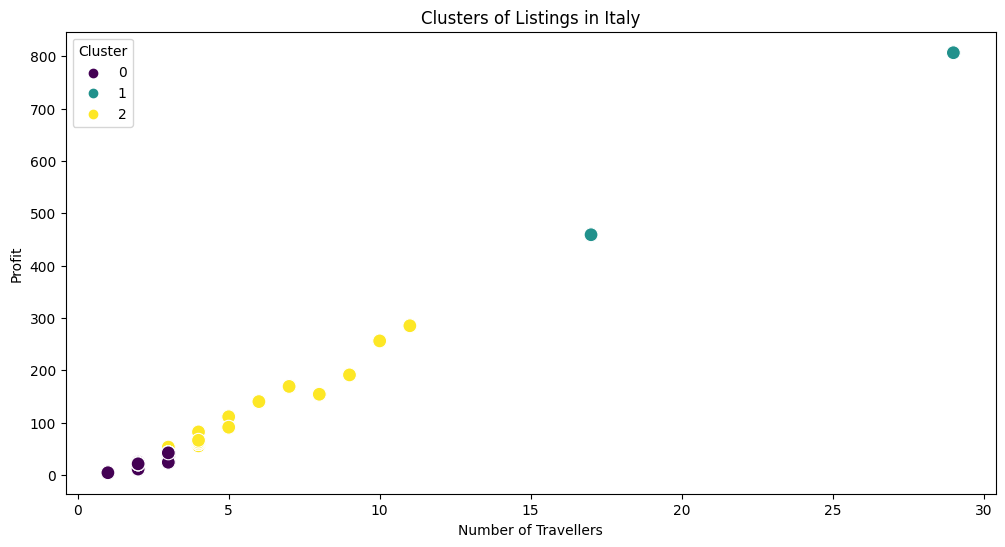

c:\Users\steve\Clio_Muse Data Analysis Project\models.py:123: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_clustered_df = country_df.groupby('Cluster').apply(lambda x: x).reset_index(drop=True)


Cluster Summary for Italy:
   Cluster  avg_num_of_travellers  total_travellers  avg_profit  total_profit  \
0        0               2.037594             813.0   22.234436       8871.54   
1        1              23.000000              46.0  633.000000       1266.00   
2        2               4.037313             541.0   78.960000      10580.64   

   avg_spending  total_spending most_common_tours most_common_travel_days  \
0     53.925689        21516.35      STL284_288DE                  Sunday   
1    667.000000         1334.00      STL284_288DE               Wednesday   
2    112.280896        15045.64      STL284_288DE               Wednesday   

   count_listings  
0             399  
1               2  
2             134  


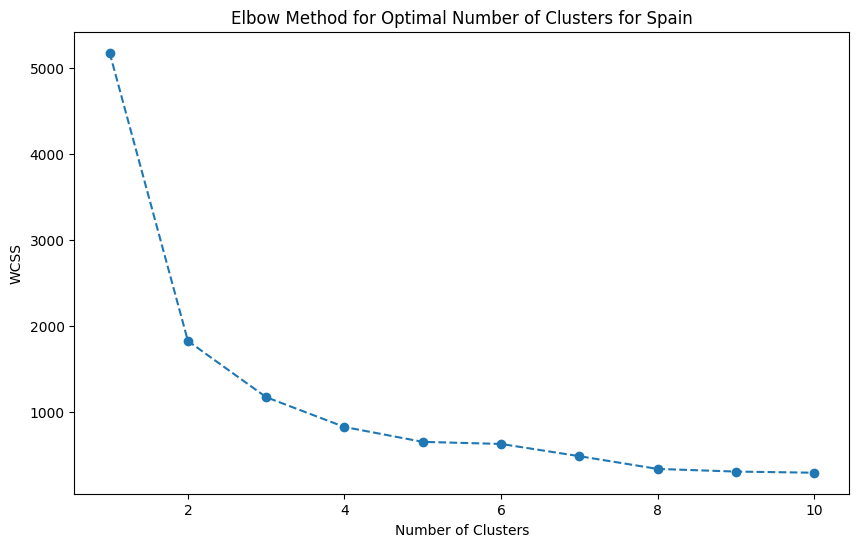

c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


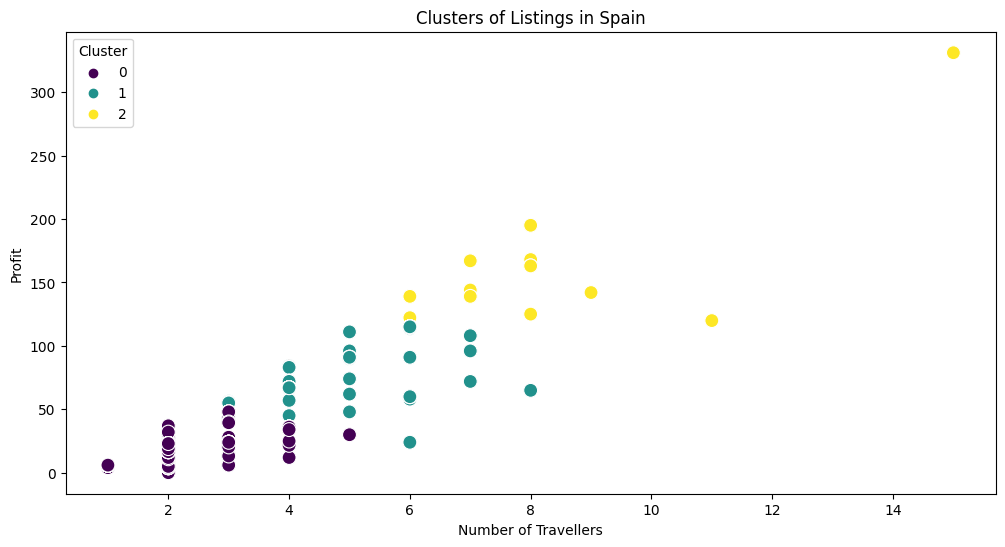

c:\Users\steve\Clio_Muse Data Analysis Project\models.py:123: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_clustered_df = country_df.groupby('Cluster').apply(lambda x: x).reset_index(drop=True)


Cluster Summary for Spain:
   Cluster  avg_num_of_travellers  total_travellers  avg_profit  total_profit  \
0        0               2.089965            3020.0   21.910803      31661.11   
1        1               4.189922            1081.0   73.183566      18881.36   
2        2               7.952381             167.0  162.576190       3414.10   

   avg_spending  total_spending most_common_tours     most_common_travel_days  \
0     45.535453        65798.73      STL535_492EN                    Thursday   
1     99.307209        25621.26      STL535_492EN                      Sunday   
2    188.575714         3960.09      STL535_492EN  Monday, Saturday, Thursday   

   count_listings  
0            1445  
1             258  
2              21  


In [ ]:
clusters(dataframe1)

Extract some data for Spain and Italy, since our association rules methods do not provide enough info. 
Find the most profitable tours for these regions

In [ ]:
spain = find_info_for_spain(dataframe1)
spain

,stories,occurences,average_travellers,Total_Travellers,Total_profit,Average_profit,Top_3_travel_days,most_common_languages
6,Entry e-tickets for The Mosque-Cathedral of Cordoba with an audio tour of the city of Cordoba,1138,2.496485,1138,38975.60,34.249209,"[(Thursday, 180), (Monday, 170), (Saturday, 170)]",[English]
4,Cordoba Mosque-Cathedral Entry Ticket,268,2.242537,268,7269.00,27.123134,"[(Tuesday, 48), (Sunday, 48), (Wednesday, 37)]",[English]
5,El Retiro Park,137,2.678832,137,2479.62,18.099416,"[(Sunday, 28), (Monday, 20), (Thursday, 19)]",[English]
0,Alcazaba and Gardens of Alhambra: E-ticket with Audio Tour on Your Phone,74,2.621622,74,2880.00,38.918919,"[(Saturday, 14), (Thursday, 14), (Monday, 13)]",[English]
11,National Archaeological Museum: Entrance e-ticket with Audio Tour and the self guided Madrid City Audio Tour,30,2.333333,30,384.00,12.800000,"[(Tuesday, 10), (Thursday, 9), (Friday, 8)]",[English]
14,The Royal Alcázares of Seville: Entrance e-ticket with Audio Tour,28,2.250000,28,976.00,34.857143,"[(Wednesday, 9), (Thursday, 5), (Monday, 4)]",[French]
8,Madrid Archaeological Museum,20,2.550000,20,367.20,18.360000,"[(Friday, 9), (Wednesday, 7), (Thursday, 3)]",[English]
9,"Madrid NAM, Lazaro, City + El Retiro AU",13,3.153846,13,390.35,30.026923,"[(Saturday, 4), (Thursday, 3), (Friday, 2)]",[English]
2,Barcelona and Park Guell,8,3.000000,8,119.84,14.980000,"[(Saturday, 5), (Friday, 1), (Tuesday, 1)]",[English]
15,Valencia: A Mediterranean Tapestry,2,2.000000,2,13.98,6.990000,"[(Wednesday, 2)]","[English, Spanish]"


Extract some info about large groups of people in Spain.

In [ ]:
spain_cluster = pd.read_csv('clusters/spain_clustered_listings.csv')
spain_cluster.columns
spain_2 = spain_cluster[spain_cluster['Cluster'] == 2]
spain_2.groupby('stories').agg(
    occurences = ('stories', 'size'),
    mean_number_of_travellers = ('num_of_travellers', 'mean'),
    mean_profit = ('Profit', 'mean')
).sort_values(by ='occurences', ascending= False)

,occurences,mean_number_of_travellers,mean_profit
stories,,,
Entry e-tickets for The Mosque-Cathedral of Cordoba with an audio tour of the city of Cordoba,16,7.75,169.7
Alcazaba and Gardens of Alhambra: E-ticket with Audio Tour on Your Phone,2,7.50,156.0
Cordoba Mosque-Cathedral Entry Ticket,2,8.50,133.5
El Retiro Park,1,11.00,119.9


Let us look further into Greece's large clusters

In [ ]:
greece_cluster = pd.read_csv('clusters/greece_clustered_listings.csv')
greece_2 = greece_cluster[greece_cluster['Cluster'] == 2]
greece_2 = greece_2.groupby('stories').agg(
    occurences = ('stories', 'size'),
    total_travellers = ('num_of_travellers', 'sum'),
    avg_travellers = ('num_of_travellers', 'mean'),
    total_profit = ('Profit', 'sum')
).reset_index
pprint(greece_2)


<bound method DataFrame.reset_index of                                                               occurences  \
stories                                                                    
Acropolis, Acropolis Museum & 6 Archaeological Sites Tickets           2   
Delphi: Skip-the-Line Ticket & Audio Guide                             1   
NAM & Athens City Tour                                                 1   
Olympia: Skip-the-Line Ticket & Audio Guide                            1   

                                                              total_travellers  \
stories                                                                          
Acropolis, Acropolis Museum & 6 Archaeological Sites Tickets              50.0   
Delphi: Skip-the-Line Ticket & Audio Guide                                24.0   
NAM & Athens City Tour                                                    28.0   
Olympia: Skip-the-Line Ticket & Audio Guide                               17.0   

           

In [ ]:
olympia_occurences = greece_cluster[greece_cluster['stories'] == 'Olympia: Skip-the-Line Ticket & Audio Guide'].value_counts()
olympia_occurences

Series([], Name: count, dtype: int64)